**TITANIC SURVIVAL PREDICTION**

**• Data Collection**

**Importing Libraries**

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Read the CSV File**

In [67]:
titanic = pd.read_csv("titanic_data.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Columns in Dataset**

In [68]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Length of Dataset**

In [69]:
len(titanic)

891

**Info about the Dataset**

In [70]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Statistical Analysis of Dataset**

In [71]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


--------------------------------------

**• Data Visualization**

**Visualization of Dataset**

**Counting the Number of Survived vs Non Survived People by their Gender**

<AxesSubplot: xlabel='Survived', ylabel='count'>

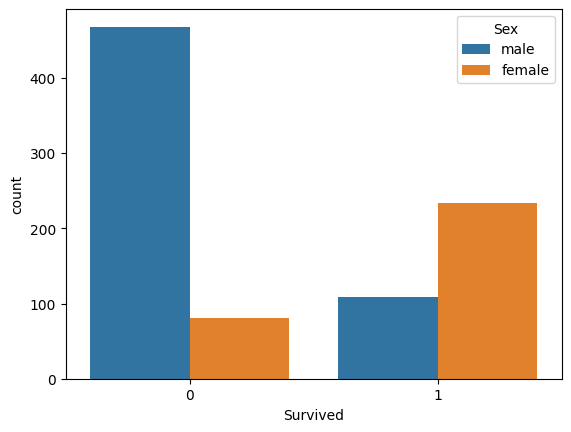

In [72]:
sns.countplot(x=titanic.Survived, data=titanic, hue="Sex")

**Number of Peoples in Different Age Group**

<AxesSubplot: xlabel='Age', ylabel='Count'>

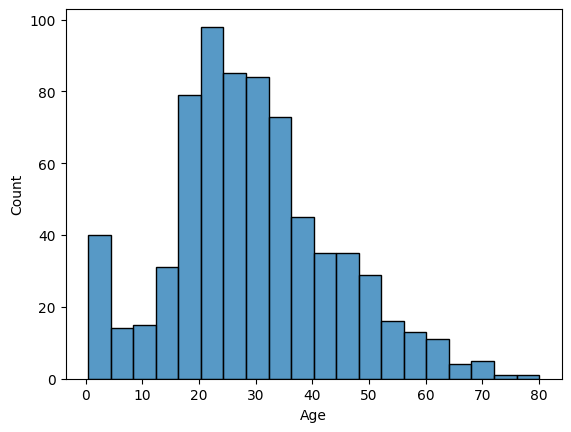

In [73]:
sns.histplot(x=titanic.Age, data=titanic)

-----------------------------

**• Data Cleaning**

**Check for Null Value's**

In [74]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Filling All Nan Values in Age with Mean of Age**

In [75]:
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)

**verifying that Nan Values are Gone**

In [76]:
titanic.Age.isna().sum()

0

**Dropping the Cabin Column because, It contains a lot of Nan Values**

In [77]:
titanic.drop("Cabin", axis=1, inplace=True)

**Dropping the Name, Ticket, Embarked Column's also because, Our Model will only work upon Numerical Data**

In [78]:
titanic.drop(["Name","Ticket","Embarked"], axis=1, inplace=True)

**Generating Dummies for Sex Column**

In [79]:
gender = pd.get_dummies(titanic.Sex, drop_first=True)

**Merging the Dummies Column in Orignal Dataset with Column Name Gender**

In [80]:
titanic["Gender"] = gender

**Dropping the Sex Column because After creating Dummies**

In [81]:
titanic.drop("Sex", axis=1, inplace=True)

--------------------------------

**• Data Modelling**

**Creating Dependent and Independent Variable's**

In [90]:
X = titanic[["PassengerId","Pclass","Age","SibSp","Parch","Fare","Gender"]]
y = titanic["Survived"]

**Importing Train Test Split**

In [86]:
from sklearn.model_selection import train_test_split

**Dividing 70% Data into Traning and 30% Data into Testing**

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Importing Logistic Regression Model**

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
lr = LogisticRegression()

**Fitting the Data to the Model**

In [96]:
lr.fit(X_train, y_train)

C:\Users\iamri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Predicting the Survival**

In [97]:
survival_predict = lr.predict(X_test)

**Checking the Score of our Model**

In [99]:
lr.score(X_train, y_train)

0.7913322632423756

----------------------------